In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy
import talib

from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = (20, 10)

In [46]:
sym = 'ETHUSD'

url = f'https://www.bitmex.com/api/v1/trade/bucketed?binSize=1h&partial=true&symbol={sym}&count=1000&reverse=true'

data = requests.get(url).json()

cf = pd.DataFrame(data)
cf = cf.sort_values('timestamp').reset_index(drop=True)

logret = np.log(cf['close'].shift(-1)) - np.log(cf['close'])

cf['logret'] = logret
cf['abs_logret'] = abs(logret)

cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
0,2025-07-12T03:00:00.000Z,ETHUSD,2960.46,2973.00,2956.05,2958.59,1893,2920,2965.64,1,865964309,343.772743,1.019504e+06,0.003243,0.003243
1,2025-07-12T04:00:00.000Z,ETHUSD,2958.59,2970.64,2957.35,2968.20,1339,1940,2964.38,1,575088616,228.467346,6.772631e+05,-0.004911,0.004911
2,2025-07-12T05:00:00.000Z,ETHUSD,2968.20,2970.67,2943.68,2953.66,1293,5936,2954.36,3,1753703001,698.959339,2.064974e+06,0.000454,0.000454
3,2025-07-12T06:00:00.000Z,ETHUSD,2953.66,2959.90,2945.44,2955.00,588,1913,2952.95,1,564896617,225.120072,6.647654e+05,0.002923,0.002923
4,2025-07-12T07:00:00.000Z,ETHUSD,2955.00,2965.00,2948.16,2963.65,450,1858,2955.19,1,549072877,218.978563,6.471223e+05,0.000354,0.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340
996,2025-08-22T15:00:00.000Z,ETHUSD,4293.27,4651.61,4295.91,4619.97,4514,38141,4527.00,1,17266386484,4374.741219,1.980735e+07,-0.001146,0.001146
997,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.028868,0.028868
998,2025-08-22T17:00:00.000Z,ETHUSD,4614.68,4783.67,4620.81,4749.84,1708,17704,4732.69,27,8378739984,2063.136011,9.764154e+06,0.020385,0.020385


<Axes: ylabel='Frequency'>

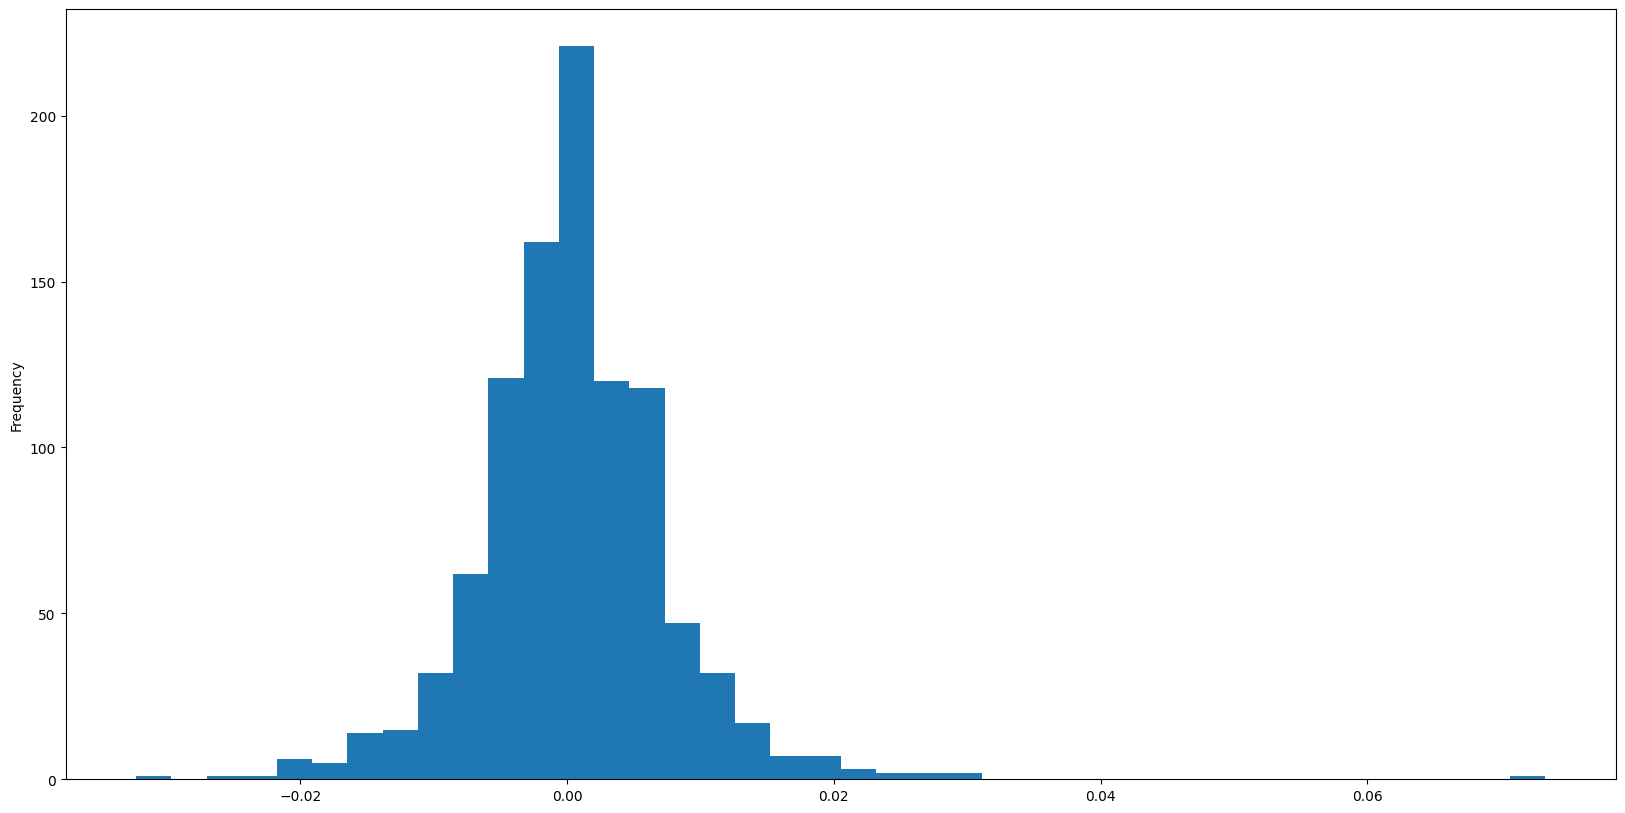

In [47]:
cf['logret'].plot(kind='hist', bins=40)

In [40]:
cf.sort_values('abs_logret', ascending=False)

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
996,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340
802,2025-08-14T12:00:00.000Z,ETHUSD,4711.62,4726.43,4696.94,4724.01,427,3483,4715.66,2,1642460595,421.142075,1.985958e+06,-0.032325,0.032325
998,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.029287,0.029287
300,2025-07-24T14:00:00.000Z,ETHUSD,3646.39,3661.96,3631.60,3635.30,901,4610,3648.35,1,1681884125,547.134231,1.996131e+06,0.028496,0.028496
659,2025-08-08T13:00:00.000Z,ETHUSD,3922.28,3921.52,3895.23,3896.26,484,6210,3899.88,39,2421819977,723.940461,2.823276e+06,0.027442,0.027442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,2025-07-12T18:00:00.000Z,ETHUSD,2925.69,2946.56,2925.14,2946.56,273,1524,2938.42,1,447813980,178.923781,5.257524e+05,-0.000003,0.000003
512,2025-08-02T10:00:00.000Z,ETHUSD,3495.10,3506.01,3484.59,3496.13,249,1460,3492.97,21,509972228,165.948586,5.796524e+05,0.000003,0.000003
226,2025-07-21T12:00:00.000Z,ETHUSD,3816.95,3843.54,3795.19,3814.95,1010,8462,3824.08,1,3235926325,1003.617051,3.837901e+06,-0.000003,0.000003
466,2025-07-31T12:00:00.000Z,ETHUSD,3858.26,3861.41,3830.00,3840.72,479,2525,3846.21,4,971166975,299.117754,1.150469e+06,0.000000,0.000000


<Axes: xlabel='timestamp'>

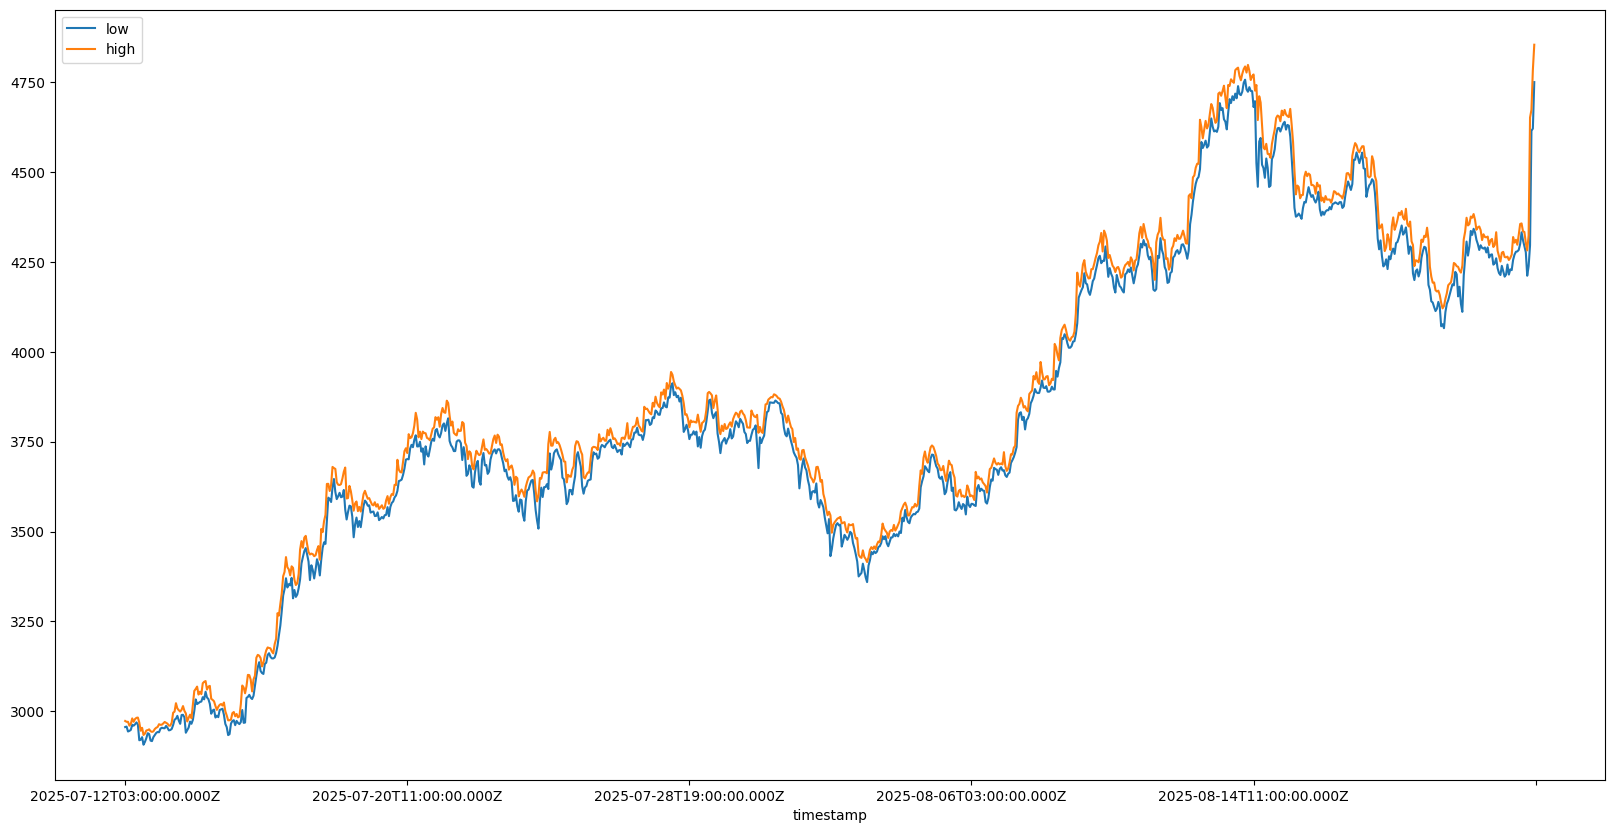

In [48]:
cf.plot(x='timestamp', y=['low', 'high'])

In [51]:
cf['rsi'] = talib.RSI(cf['close'])

cf['rsi'].subplots?

Object `subplots` not found.


<Axes: >

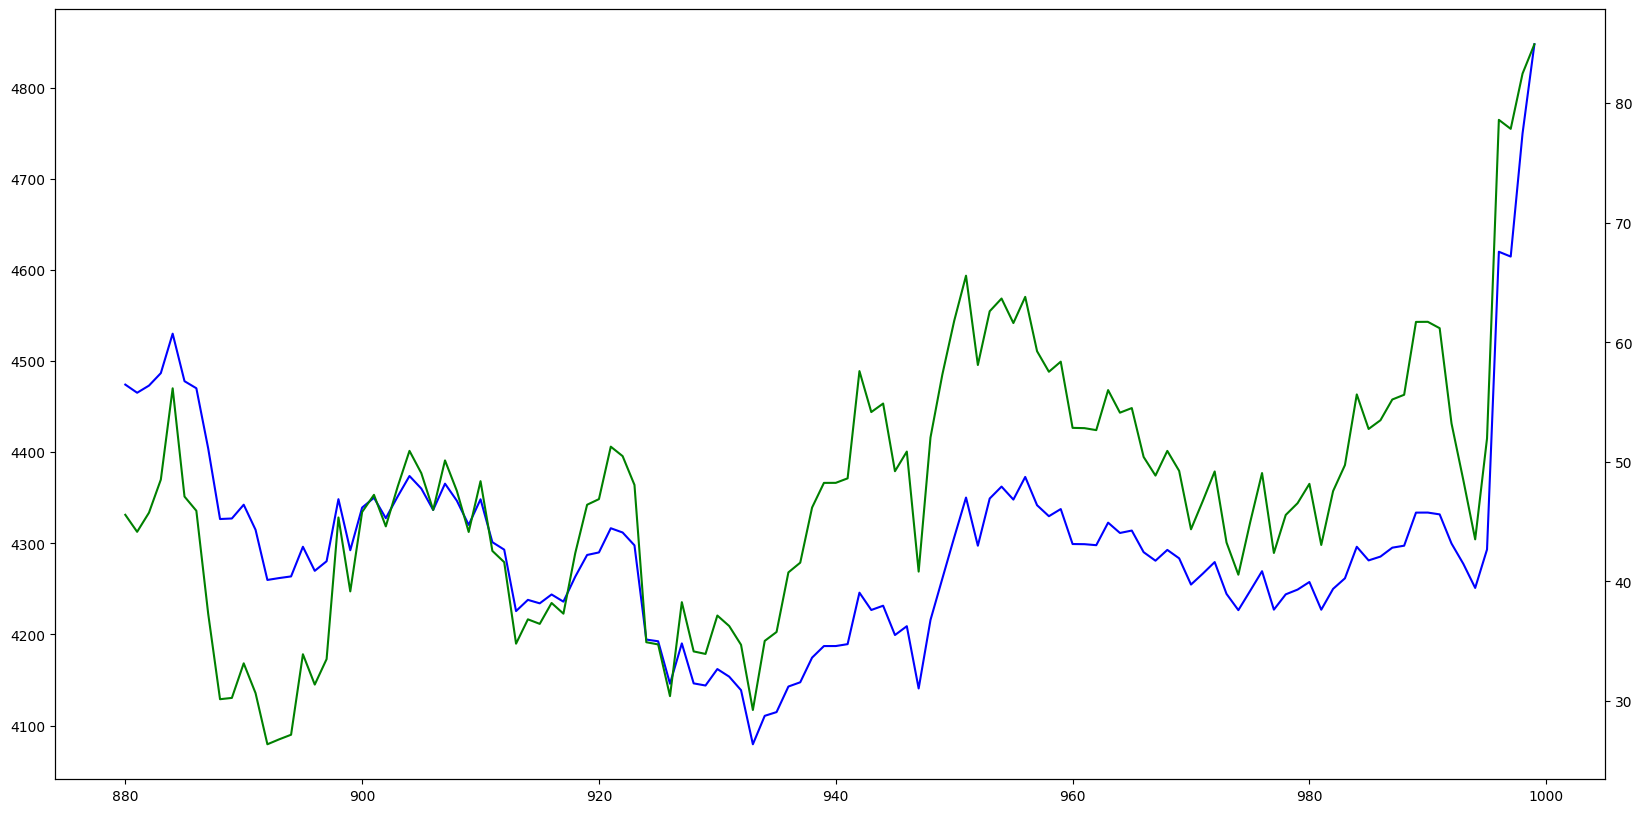

In [56]:
fig, ax1 = plt.subplots()

N = 120

ax2 = ax1.twinx()

cf['close'][-N:].plot(ax=ax1, style='b-')

cf['rsi'][-N:].plot(ax=ax2, style='g-')

In [57]:
cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret,rsi
0,2025-07-12T03:00:00.000Z,ETHUSD,2960.46,2973.00,2956.05,2958.59,1893,2920,2965.64,1,865964309,343.772743,1.019504e+06,0.003243,0.003243,NaN
1,2025-07-12T04:00:00.000Z,ETHUSD,2958.59,2970.64,2957.35,2968.20,1339,1940,2964.38,1,575088616,228.467346,6.772631e+05,-0.004911,0.004911,NaN
2,2025-07-12T05:00:00.000Z,ETHUSD,2968.20,2970.67,2943.68,2953.66,1293,5936,2954.36,3,1753703001,698.959339,2.064974e+06,0.000454,0.000454,NaN
3,2025-07-12T06:00:00.000Z,ETHUSD,2953.66,2959.90,2945.44,2955.00,588,1913,2952.95,1,564896617,225.120072,6.647654e+05,0.002923,0.002923,NaN
4,2025-07-12T07:00:00.000Z,ETHUSD,2955.00,2965.00,2948.16,2963.65,450,1858,2955.19,1,549072877,218.978563,6.471223e+05,0.000354,0.000354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340,51.963409
996,2025-08-22T15:00:00.000Z,ETHUSD,4293.27,4651.61,4295.91,4619.97,4514,38141,4527.00,1,17266386484,4374.741219,1.980735e+07,-0.001146,0.001146,78.598827
997,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.028868,0.028868,77.846138
998,2025-08-22T17:00:00.000Z,ETHUSD,4614.68,4783.67,4620.81,4749.84,1708,17704,4732.69,27,8378739984,2063.136011,9.764154e+06,0.020385,0.020385,82.466242


<Axes: xlabel='rsi', ylabel='logret_k'>

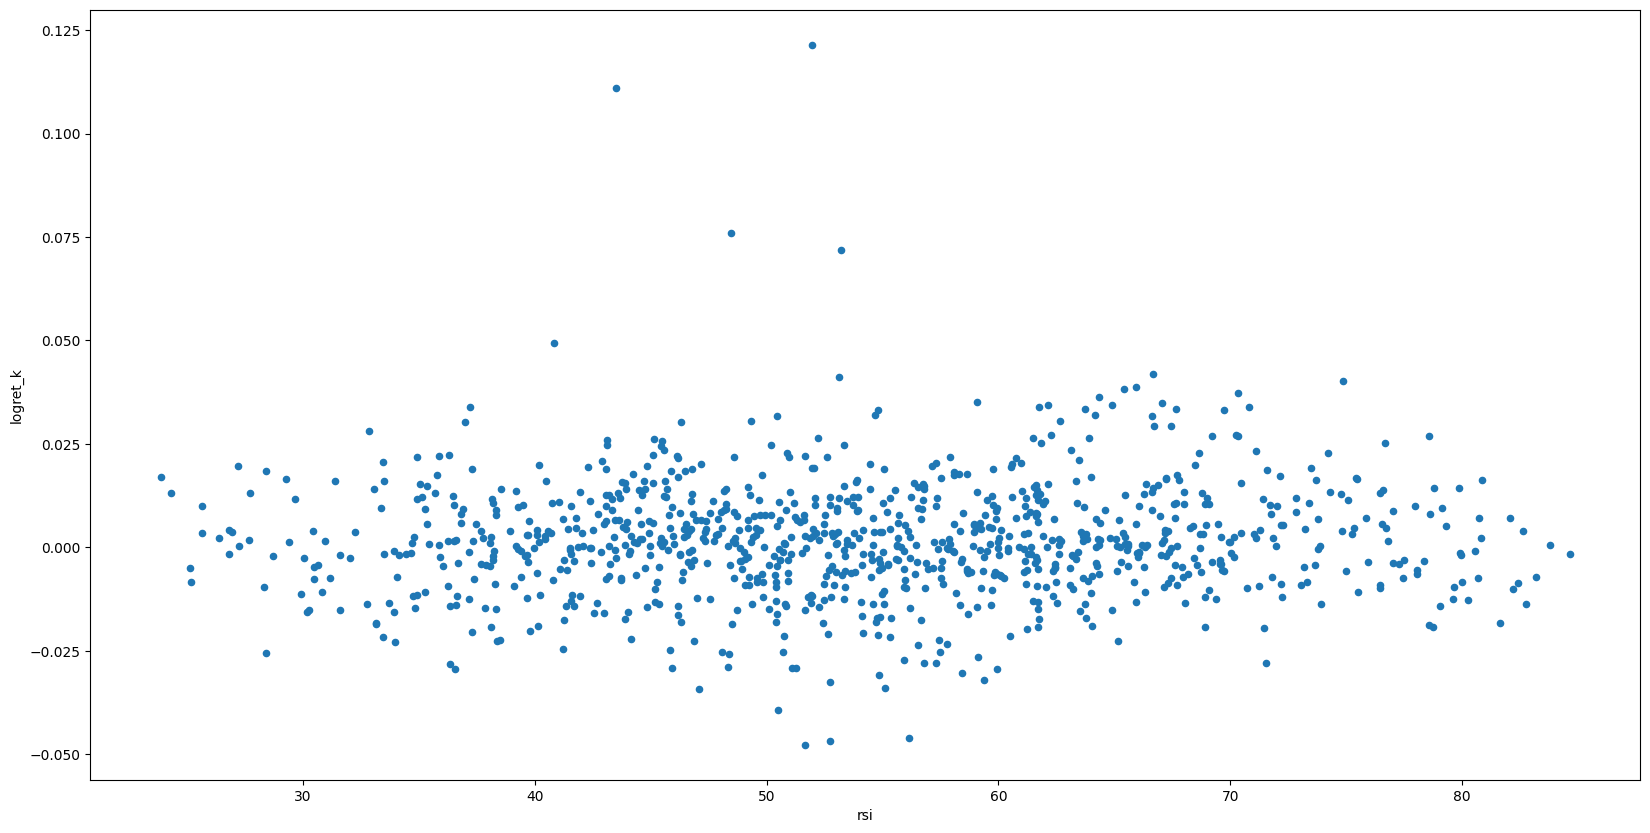

In [63]:
k = 4

cf['logret_k'] = np.log(cf['close'].shift(-k)) - np.log(cf['close'])

cf.plot(x='rsi', y='logret_k', kind='scatter')